# Youtube Data Analysts Channels Project

## Import Libraries
In this section we are going to import our libraries.

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import psycopg2 as ps

## Setup
First you will need to create an API key by going to __[Youtube API signup](https://console.cloud.google.com/apis/)__. Then I created an environment variable named **api_key** and paste in your key.
After that I created a list of channel ids that I want to use for analysis and setup the youtube variable.

In [2]:
api_key = 'XXXXX'
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', # techTFQ
               'UCLLw7jmFsvfIVaUFsLs8mlQ', # Luke Barousse 
               'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
               'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the analyst
               'UC2UXDak6o7rBm23k3Vv5dww', # Tina Huang
               'UCvZnwzmc3m1Eush-Or8Z6DA', # Shashank Kalanithi
               'UCq6XkhO5SZ66N04IcPbqNcw', # Keith Galli
               'UCW8Ews7tdKKkBT6GdtQaXvQ', # Nate StrataScratch
               'UCmLGJ3VYBcfRaWbP6JLJcpA', # Seattle Data Guy
               'UCV8e2g4IWQqK71bbzGDEI4Q'  # Data Professor
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

## Channel Stats
In this section I defined a function to gather data from the list of channels stated in the section above.
I gathered the upload playlist from each channel (containing all of their videos) and use that to get details from each video as we'll see in the next section.

In [3]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(part='snippet,contentDetails,statistics',id=','.join(channel_ids))
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                        Subscribers = response['items'][i]['statistics']['subscriberCount'],
                        Views = response['items'][i]['statistics']['viewCount'],
                        Total_videos = response['items'][i]['statistics']['videoCount'],
                        playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'],
                        Published_date = response['items'][i]['snippet']['publishedAt'],
                    )
        all_data.append(data)

    return all_data

### Create channel stats

In [4]:
channel_statistics = get_channel_stats(youtube,channel_ids)

### Convert channel stats into a pandas dataframe

In [5]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id,Published_date
0,techTFQ,56600,2343006,52,UUnz-ZXXER4jOvuED5trXfEA,2020-06-13T05:20:37.182391Z
1,Ken Jee,192000,5935334,228,UUiT9RITQ9PW6BhXK0y2jaeg,2014-02-28T14:58:24Z
2,Luke Barousse,146000,7246147,72,UULLw7jmFsvfIVaUFsLs8mlQ,2020-08-03T09:02:41.213077Z
3,Shashank Kalanithi,79000,3112432,107,UUvZnwzmc3m1Eush-Or8Z6DA,2011-10-01T21:44:24Z
4,Keith Galli,151000,9895657,70,UUq6XkhO5SZ66N04IcPbqNcw,2016-12-27T20:18:51Z
5,Alex The Analyst,186000,7156689,133,UU7cs8q-gJRlGwj4A8OmCmXg,2020-01-08T05:04:24.970712Z
6,Tina Huang,284000,10223930,88,UU2UXDak6o7rBm23k3Vv5dww,2013-08-28T18:05:17Z
7,Seattle Data Guy,23900,1110599,120,UUmLGJ3VYBcfRaWbP6JLJcpA,2017-01-27T06:50:30Z
8,Data Professor,112000,2687797,268,UUV8e2g4IWQqK71bbzGDEI4Q,2019-08-17T15:59:56Z
9,StrataScratch,25400,755696,84,UUW8Ews7tdKKkBT6GdtQaXvQ,2019-05-27T18:14:27Z


### Convert the columns to the correct data type

In [6]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data['Published_date'] = pd.to_datetime(channel_data['Published_date'], format='%Y-%m-%d %H:%M:%S')

channel_data.dtypes

Channel_name                   object
Subscribers                     int64
Views                           int64
Total_videos                    int64
playlist_id                    object
Published_date    datetime64[ns, UTC]
dtype: object

### Plotting Number of Subscribers per Channel

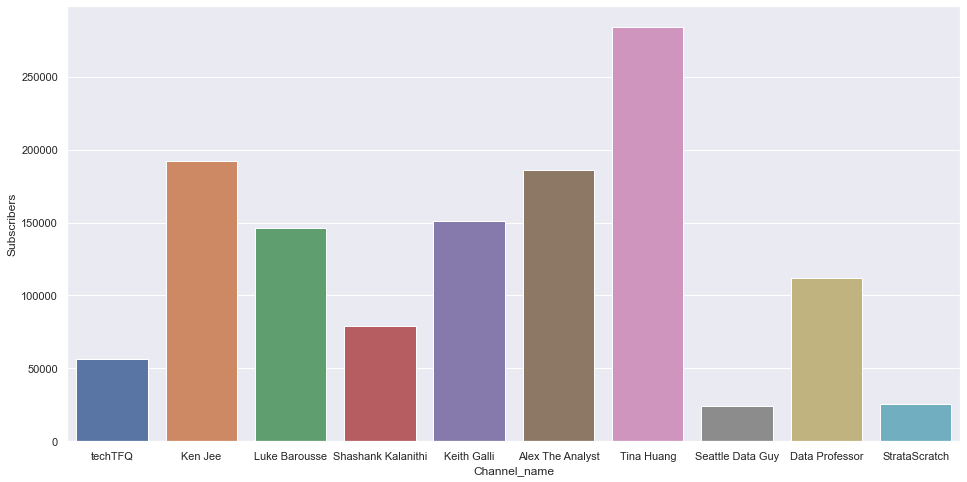

In [7]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

### Plotting Number of Views per Channel

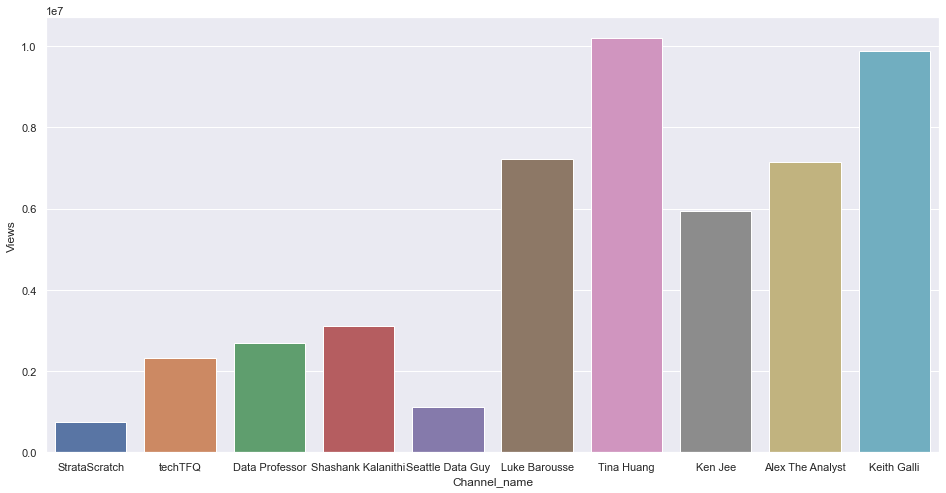

In [8]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

### Plotting Number of Videos per Channel

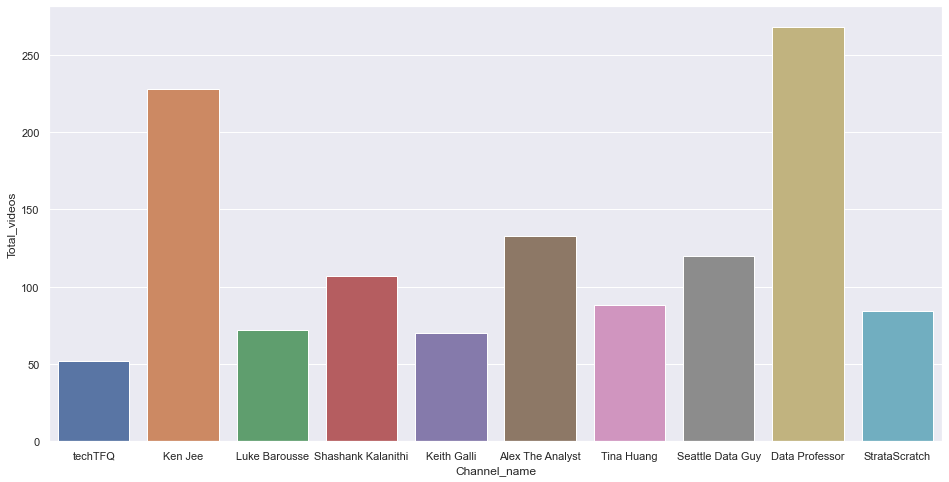

In [8]:
sns.set(rc={'figure.figsize':(16,8)})
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

### Plotting Heatmap with correlation between numeric variables (Subscribers, Views, Videos)

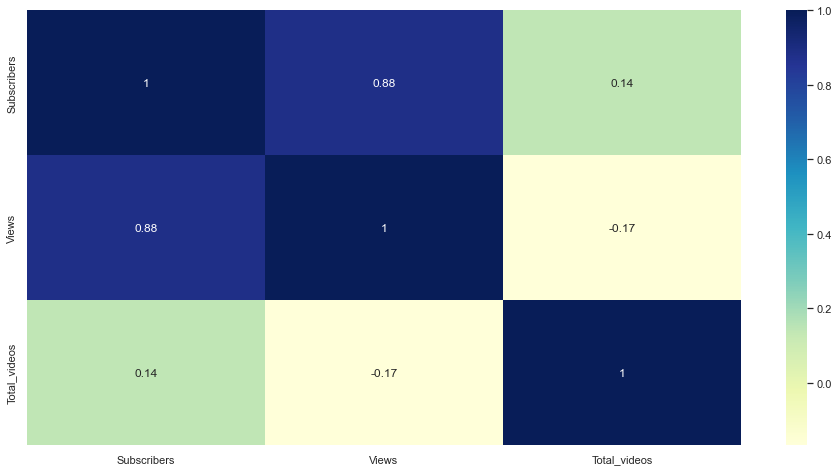

In [9]:
dataplot = sns.heatmap(channel_data.corr(), cmap='YlGnBu', annot=True)

## Scrape Video Details for all youtube channels

### Get playlists with all videos for each channel

In [10]:
playlist_id = channel_data['playlist_id']
playlist_id

0    UUnz-ZXXER4jOvuED5trXfEA
1    UUiT9RITQ9PW6BhXK0y2jaeg
2    UULLw7jmFsvfIVaUFsLs8mlQ
3    UUvZnwzmc3m1Eush-Or8Z6DA
4    UUq6XkhO5SZ66N04IcPbqNcw
5    UU7cs8q-gJRlGwj4A8OmCmXg
6    UU2UXDak6o7rBm23k3Vv5dww
7    UUmLGJ3VYBcfRaWbP6JLJcpA
8    UUV8e2g4IWQqK71bbzGDEI4Q
9    UUW8Ews7tdKKkBT6GdtQaXvQ
Name: playlist_id, dtype: object

### Function to get video ids from each channel

In [11]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(part='contentDetails',playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids_dict = dict(Video_id = response['items'][i]['contentDetails']['videoId'],
                                        Playlist_id = playlist_id)
        video_ids.append(video_ids_dict)

    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(part='contentDetails',playlistId = playlist_id,
            maxResults = 50, pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids_dict = dict(Video_id = response['items'][i]['contentDetails']['videoId'],
                                        Playlist_id = playlist_id)
                video_ids.append(video_ids_dict)

            next_page_token = response.get('nextPageToken')

    return video_ids

#### Execute function for all channels and save in a list

In [12]:
video_ids = []
for video in range(len(playlist_id)):
    video_ids.append(get_video_ids(youtube, playlist_id[video]))

### Function to get video details from all channels

In [13]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for channel in range(len(video_ids)):
        video_ids_values = [a_dict['Video_id'] for a_dict in video_ids[channel]]
        for i in range(0, len(video_ids_values), 50):
            request = youtube.videos().list(
                        part='snippet,statistics,contentDetails',
                        id = ','.join(video_ids_values[i:i+50]))
            response = request.execute()
            for video in response['items']:
                video_stats = dict(Video_id = video['id'],
                                    Title = video['snippet']['title'],
                                    Title_length = len(video['snippet']['title']),
                                    Title_word_count = len(video['snippet']['title'].split()),
                                    Published_date = video['snippet']['publishedAt'],
                                    Tags = video['snippet'].get('tags',[]),
                                    Tag_count = len(video['snippet'].get('tags',[])),
                                    Views = video['statistics']['viewCount'],
                                    Likes = video['statistics']['likeCount'],
                                    Comments = video['statistics']['commentCount'],
                                    Channel_name = video['snippet']['channelTitle'],
                                    Duration = video['contentDetails']['duration']
                                    )
                all_video_stats.append(video_stats)

    return all_video_stats

#### Execute function for all channels and save in a list

In [14]:
video_details = get_video_details(youtube, video_ids)

#### Save video details into a Dataframe

In [15]:
video_data = pd.DataFrame(video_details)

### Convert Duration from ISO 8601 date and time format using to_timedelta function

In [16]:
video_data['Duration'] = pd.to_timedelta(video_data['Duration'])

### Convert object types columns to the correct type

In [17]:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date'], format='%Y-%m-%d %H:%M:%S')
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

video_data.dtypes

Video_id                         object
Title                            object
Title_length                      int64
Title_word_count                  int64
Published_date      datetime64[ns, UTC]
Tags                             object
Tag_count                         int64
Views                             int64
Likes                             int64
Comments                          int64
Channel_name                     object
Duration                timedelta64[ns]
dtype: object

### Rank the data by most viewed videos

In [18]:
video_data['Rank'] = video_data['Views'].rank(ascending=False, method='dense')

## Clean data

### Remove columns not needed

In [19]:
channel_data = channel_data.drop('playlist_id', 1)

C:\Users\u10054206\AppData\Local\Temp\ipykernel_20548\3520691713.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  channel_data = channel_data.drop('playlist_id', 1)


#### Remove timezone from Published Date

In [20]:
video_data['Published_date'] = video_data['Published_date'].dt.tz_convert(None)

In [21]:
video_data.dtypes

Video_id                     object
Title                        object
Title_length                  int64
Title_word_count              int64
Published_date       datetime64[ns]
Tags                         object
Tag_count                     int64
Views                         int64
Likes                         int64
Comments                      int64
Channel_name                 object
Duration            timedelta64[ns]
Rank                        float64
dtype: object

## Analysis

### Plotting Heatmap with correlation between numeric variables

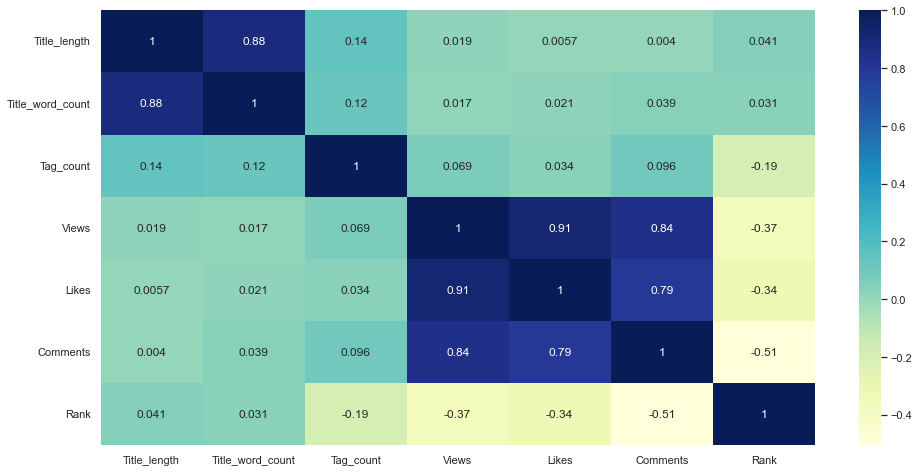

In [22]:
dataplot = sns.heatmap(video_data.corr(), cmap='YlGnBu', annot=True)

### Count titles and tags words by ocurrences for the top 50 most viewed videos.

In [23]:
top50_videos = video_data.sort_values(by='Rank', ascending=True).head(50)

In [24]:
import re
tags_list = []
titles_list = []
for tags in top50_videos['Tags']:
    tags_list.append(re.findall('\w+', ','.join(tags).lower()))

for title in top50_videos['Title']:
    titles_list.append(re.findall('\w+', title.lower()))

#### Remove words not relevant for the analysis

In [25]:
tags_words = []
titles_words = []
remove_words = ['to', 'how', 'for', 'a', 'in', 'ken', 'jee', 'the', 'and', 'vs', 'with', 'of', 'is', 'i', 'on', 'alex',
                'keith', 'galli', 'at']

for i in range(len(tags_list)):
    for word in tags_list[i]:
        if word not in remove_words:
            tags_words.append(word.lower())

for i in range(len(titles_list)):
    for word in titles_list[i]:
        if word not in remove_words:
            titles_words.append(word.lower())

#### Count words used in title and tags

In [26]:
from collections import Counter

total_tags_words = Counter()
total_titles_words = Counter()

for word in tags_words:
    total_tags_words[word]+=1

for word in titles_words:
    total_titles_words[word]+=1

total_tags_words.most_common()[0:10]

[('data', 335),
 ('analyst', 128),
 ('science', 126),
 ('python', 94),
 ('sql', 70),
 ('learn', 44),
 ('scientist', 44),
 ('google', 41),
 ('connect', 40),
 ('tutorial', 39)]

In [27]:
def get_words_count(dictionary):
    keys = []
    values = []
    for key, value in dictionary.items():
        keys.append(key)
        values.append(value)
    return keys, values

total_titles_words_keys, total_titles_words_values = get_words_count(total_titles_words)
total_tags_words_keys, total_tags_words_values = get_words_count(total_tags_words)

#### Create dataframes to store the data from the most common words used in the top 50 videos (title and tags)

In [28]:
df_titles_words = pd.DataFrame(data={'Title Word':total_titles_words_keys,'Title Word Count':total_titles_words_values}) 
df_tags_words = pd.DataFrame(data={'Tag Word':total_tags_words_keys, 'Tag Word Count':total_tags_words_values})

## Connect to AWS Postgres Database to update/insert data

### Function to connect to the AWS RDS Database

In [29]:
def connect_to_db(host_name, dbname, port, username, password):
    try:
        conn = ps.connect(host = host_name, database = dbname, user = username, password = password, port=port)
    except ps.OperationalError as e:
        raise e
    else:
        print('Connected!')
    return conn

### Functions to manipulate data into table youtubers (create/insert/update)

In [30]:
# Function to create table youtubers if doesn't exist
def create_table_youtubers(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS youtubers (
                            channel_name VARCHAR(255) PRIMARY KEY,
                            subscribers INTEGER NOT NULL,
                            views INTEGER NOT NULL,
                            total_videos INTEGER NOT NULL,
                            published_date TIMESTAMP NOT NULL
    )""")
    curr.execute(create_table_command)

# Function to insert new records into table youtubers if doesn't exist
def insert_into_youtubers(curr, channel_name, subscribers, views, total_videos, published_date):
    insert_into_youtubers = ("""INSERT INTO youtubers (channel_name, subscribers, views, total_videos, published_date)
                            VALUES(%s, %s, %s, %s, %s)
                        ;""")

    row_to_insert = (channel_name, subscribers, views, total_videos, published_date)
    curr.execute(insert_into_youtubers, row_to_insert)

# Function to update records in table youtubers if exists
def update_row_youtuber(curr, channel_name, subscribers, views, total_videos, published_date):
    query = ("""UPDATE youtubers
                SET subscribers = %s,
                    views = %s,
                    total_videos = %s,
                    published_date = %s
                WHERE channel_name = %s;"""
                    )
    vars_to_update = (subscribers, views, total_videos, published_date, channel_name)
    curr.execute(query, vars_to_update)

# Function to check if youtuber exists
def check_if_youtuber_exists(curr, channel_name):
    query = ("""SELECT channel_name FROM youtubers WHERE channel_name = %s;""")
    curr.execute(query, (channel_name,))
    return curr.fetchone() is not None

# Function to insert new records into table youtubers if doesn't exist
def append_from_df_to_db_youtubers(curr, channel_data):
    for i, row in channel_data.iterrows():
        insert_into_youtubers(curr, row['Channel_name'], row['Subscribers'], row['Views'],
                                row['Total_videos'], row['Published_date'])

# Function to update records in table youtubers if exists
def update_db_youtuber(curr, channel_data):
    tmp_df = pd.DataFrame(columns = ['Channel_name', 'Subscribers', 'Views', 'Total_videos', 'Published_date'])
    for i, row in channel_data.iterrows():
        if check_if_youtuber_exists(curr, row['Channel_name']): # If channel already exists then we will update
            update_row_youtuber(curr, row['Channel_name'], row['Subscribers'], row['Views'],
                                row['Total_videos'], row['Published_date'])
        else: # The youtuber doesn't exist so we will append to the database table
            tmp_df = tmp_df.append(row)

    return tmp_df

# Function to delete all rows from table youtubers
def truncate_table_youtuber(curr):
    truncate_table = ("""TRUNCATE TABLE youtubers""")

    curr.execute(truncate_table)

### Functions to manipulate data into table videos (create/insert/update)

In [31]:
# Function to create table videos if doesn't exist
def create_table_videos(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS videos (
                            video_id VARCHAR(255) PRIMARY KEY,
                            title VARCHAR(255) NOT NULL,
                            title_word_count INTEGER NOT NULL,
                            published_date TIMESTAMP NOT NULL,
                            tags TEXT NOT NULL,
                            tag_count INTEGER NOT NULL,
                            views INTEGER NOT NULL,
                            likes INTEGER NOT NULL,
                            comments INTEGER NOT NULL,
                            channel_name VARCHAR(255) NOT NULL,
                            duration TIME NOT NULL,
                            rank INTEGER NOT NULL
    )""")
    curr.execute(create_table_command)

# Function to insert new records into table videos if doesn't exist
def insert_into_videos(curr, video_id, title, title_word_count, published_date, tags, tag_count, views, likes, comments, channel_name, duration, rank):
    insert_into_videos = ("""INSERT INTO videos (video_id, title, title_word_count, published_date, tags, tag_count, 
                            views, likes, comments, channel_name, duration, rank)
                            VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                        ;""")

    row_to_insert = (video_id, title, title_word_count, published_date, tags, tag_count, views, likes, comments, channel_name, duration, rank)

    curr.execute(insert_into_videos, row_to_insert)

# Function to update records in table videos if exists
def update_row_video(curr, video_id, title, title_word_count, published_date, tags, tag_count, views, likes, comments, channel_name, duration, rank):
    query = ("""UPDATE videos
                SET title = %s,
                    title_word_count = %s,
                    published_date = %s,
                    tags = %s,
                    tag_count = %s,
                    views = %s,
                    likes = %s,
                    comments = %s,
                    channel_name = %s,
                    duration = %s,
                    rank = %s
                WHERE video_id = %s;"""
                    )
    vars_to_update = (title, title_word_count, published_date, tags, tag_count, views, likes, comments, channel_name, duration, rank, video_id)
    curr.execute(query, vars_to_update)

# check if video exists
def check_if_video_exists(curr, video_id):
    query = ("""SELECT video_id FROM videos WHERE video_id = %s""")
    curr.execute(query, (video_id,))

    return curr.fetchone() is not None

# Function to insert new records into table videos if doesn't exist
def append_from_df_to_db_videos(curr, video_data):
    for i, row in video_data.iterrows():
        insert_into_videos(curr, row['Video_id'], row['Title'], row['Title_word_count'], row['Published_date'], row['Tags'],
                            row['Tag_count'], row['Views'], row['Likes'], row['Comments'], row['Channel_name'],
                            row['Duration'], row['Rank'])

# Function to update records in table videos if exists
def update_db_video(curr, video_data):
    tmp_df = pd.DataFrame(columns = ['Video_id', 'Title', 'Title_word_count', 'Published_date', 'Tags', 'Tag_count',
                                    'Views', 'Likes', 'Comments', 'Channel_name', 'Duration', 'Rank'])

    for i, row in video_data.iterrows():
        if check_if_video_exists(curr, row['Video_id']): # If video already exists then we will update
            update_row_video(curr, row['Video_id'], row['Title'], row['Title_word_count'], row['Published_date'], row['Tags'],
                        row['Tag_count'], row['Views'], row['Likes'], row['Comments'], row['Channel_name'],
                        row['Duration'], row['Rank'])
        else: # The video doesn't exist so we will append to the database table
            tmp_df = tmp_df.append(row)
            
    return tmp_df

# Function to delete all rows from table videos
def truncate_table_video(curr):
    truncate_table = ("""TRUNCATE TABLE videos""")

    curr.execute(truncate_table)

### Functions to manipulate data into table tags (create/insert/update)

In [32]:
# Function to create table tags if doesn't exist
def create_table_tags(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS tags (
                            tag_word VARCHAR(255) PRIMARY KEY,
                            tag_word_count INTEGER NOT NULL
    )""")
    curr.execute(create_table_command)

# Function to insert new records into table tags if doesn't exist
def insert_into_tags(curr, tag_word, tag_word_count):
    insert_into_tags = ("""INSERT INTO tags (tag_word, tag_word_count)
                            VALUES(%s, %s)
                        ;""")

    row_to_insert = (tag_word, tag_word_count)
    curr.execute(insert_into_tags, row_to_insert)

# Function to update records in table tags if exists
def update_row_tag(curr, tag_word, tag_word_count):
    query = ("""UPDATE tags
                SET tag_word_count = %s
                WHERE tag_word = %s;"""
                    )
    vars_to_update = (tag_word_count, tag_word)
    curr.execute(query, vars_to_update)

# Function to check if tag exists
def check_if_tag_exists(curr, tag_word):
    query = ("""SELECT tag_word FROM tags WHERE tag_word = %s;""")
    curr.execute(query, (tag_word,))
    return curr.fetchone() is not None

# Function to insert new records into table tags if doesn't exist
def append_from_df_to_db_tags(curr, df_tags_words):
    for i, row in df_tags_words.iterrows():
        insert_into_tags(curr, row['Tag Word'], row['Tag Word Count'])

# Function to update records in table tags if exists
def update_db_tag(curr, df_tags_words):
    tmp_df = pd.DataFrame(columns = ['Tag Word', 'Tag Word Count'])
    for i, row in df_tags_words.iterrows():
        if check_if_tag_exists(curr, row['Tag Word']): # If tag already exists then we will update
            update_row_tag(curr, row['Tag Word'], row['Tag Word Count'])
        else: # The tag doesn't exist so we will append to the database table
            tmp_df = tmp_df.append(row)

    return tmp_df

# Function to delete all rows from table tags
def truncate_table_tag(curr):
    truncate_table = ("""TRUNCATE TABLE tags""")

    curr.execute(truncate_table)

### Functions to manipulate data into table titles (create/insert/update)

In [52]:
# Function to create table titles if doesn't exist
def create_table_titles(curr):
    create_table_command = ("""CREATE TABLE IF NOT EXISTS titles (
                            title_word VARCHAR(255) PRIMARY KEY,
                            title_word_count INTEGER NOT NULL
    )""")
    curr.execute(create_table_command)

# Function to insert new records into table titles if doesn't exist
def insert_into_titles(curr, title_word, title_word_count):
    insert_into_tags = ("""INSERT INTO titles (title_word, title_word_count)
                            VALUES(%s, %s)
                        ;""")

    row_to_insert = (title_word, title_word_count)
    curr.execute(insert_into_tags, row_to_insert)

# Function to update records in table titles if exists
def update_row_title(curr, title_word, title_word_count):
    query = ("""UPDATE titles
                SET title_word_count = %s
                WHERE title_word = %s;"""
                    )
    vars_to_update = (title_word_count, title_word)
    curr.execute(query, vars_to_update)

# Function to check if title exists
def check_if_title_exists(curr, title_word):
    query = ("""SELECT title_word FROM titles WHERE title_word = %s;""")
    curr.execute(query, (title_word,))
    return curr.fetchone() is not None

# Function to insert new records into table titles if doesn't exist
def append_from_df_to_db_titles(curr, df_titles_words):
    for i, row in df_titles_words.iterrows():
        insert_into_titles(curr, row['Title Word'], row['Title Word Count'])

# Function to update records in table titles if exists
def update_db_title(curr, df_titles_words):
    tmp_df = pd.DataFrame(columns = ['Title Word', 'Title Word Count'])
    for i, row in df_titles_words.iterrows():
        if check_if_title_exists(curr, row['Title Word']): # If title already exists then we will update
            update_row_title(curr, row['Title Word'], row['Title Word Count'])
        else: # The title doesn't exist so we will append to the database table
            tmp_df = tmp_df.append(row)

    return tmp_df

# Function to delete all rows from table titles
def truncate_table_title(curr):
    truncate_table = ("""TRUNCATE TABLE titles""")

    curr.execute(truncate_table)

### Database Credentials

In [35]:
host_name = 'XXXXXX'
dbname = 'XXX'
port = '5432'
username = 'XXX'
password = 'XXXXX'
conn = None

### Establish a connection to database

In [54]:
conn = connect_to_db(host_name, dbname, port, username, password)
curr = conn.cursor()

Connected!


#### Create Table Youtubers (Channels)

In [37]:
create_table_youtubers(curr)

#### Create Table Videos

In [38]:
create_table_videos(curr)

#### Create Table Tags

In [39]:
create_table_tags(curr)

#### Create Table Titles

In [40]:
create_table_titles(curr)

### Update data for existing youtubers

In [41]:
new_channel_df = update_db_youtuber(curr, channel_data)
conn.commit()

### Update data for existing videos

In [42]:
new_video_df = update_db_video(curr, video_data)
conn.commit()

C:\Users\u10054206\AppData\Local\Temp\ipykernel_20548\2477253502.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append(row)


#### Update data for existing tags

In [ ]:
new_tag_df = update_db_tag(curr, df_tags_words)
conn.commit()

#### Update data for existing titles

In [ ]:
new_title_df = update_db_title(curr, df_titles_words)
conn.commit()

### Insert new youtubers into database table

In [48]:
append_from_df_to_db_youtubers(curr, new_channel_df)
conn.commit()

### Insert new videos into database table

In [49]:
append_from_df_to_db_videos(curr, new_video_df)
conn.commit()

### Insert new tags into database table

In [50]:
append_from_df_to_db_tags(curr, new_tag_df)
conn.commit()

### Insert new titles into database table

In [55]:
append_from_df_to_db_titles(curr, new_title_df)
conn.commit()

### View data in database table youtubers

In [56]:
curr.execute("SELECT * FROM youtubers")
print(curr.fetchall())

[('techTFQ', 56600, 2343006, 52, datetime.datetime(2020, 6, 13, 5, 20, 37, 182391)), ('Ken Jee', 192000, 5935334, 228, datetime.datetime(2014, 2, 28, 14, 58, 24)), ('Luke Barousse', 146000, 7246147, 72, datetime.datetime(2020, 8, 3, 9, 2, 41, 213077)), ('Shashank Kalanithi', 79000, 3112432, 107, datetime.datetime(2011, 10, 1, 21, 44, 24)), ('Keith Galli', 151000, 9895657, 70, datetime.datetime(2016, 12, 27, 20, 18, 51)), ('Alex The Analyst', 186000, 7156689, 133, datetime.datetime(2020, 1, 8, 5, 4, 24, 970712)), ('Tina Huang', 284000, 10223930, 88, datetime.datetime(2013, 8, 28, 18, 5, 17)), ('Seattle Data Guy', 23900, 1110599, 120, datetime.datetime(2017, 1, 27, 6, 50, 30)), ('Data Professor', 112000, 2687797, 268, datetime.datetime(2019, 8, 17, 15, 59, 56)), ('StrataScratch', 25400, 755696, 84, datetime.datetime(2019, 5, 27, 18, 14, 27))]
